In [1]:
import os
import numpy as np
from PIL import Image
import random
from matplotlib import pyplot as plt
from tensorflow import keras

In [2]:
import cv2
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
# 이미지 불러오기(한번만)
path = 'data/Ryu/'
file_list = os.listdir(path)

for A in file_list:
    if A == ".DS_Store":
        continue
    img = cv2.imread(path + A)
    res = cv2.resize(img, dsize=(60, 90), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite('data/Ryu/'+ A, res)

FileNotFoundError: [Errno 2] No such file or directory: 'data/Ryu/'

In [ ]:
# 이미지 불러오기2(한번만)
path = 'data/Oh/'
file_list = os.listdir(path)

for A in file_list:
    if A == ".DS_Store":
        continue
    img = cv2.imread(path + A)
    res2 = cv2.resize(img, dsize=(60, 90), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite('data/Oh/'+ A, res)

In [ ]:
# 이미지 불러오기3(한번만)
path = 'data/Lee/'
file_list = os.listdir(path)

for A in file_list:
    if A == ".DS_Store":
        continue
    img = cv2.imread(path + A)
    res3 = cv2.resize(img, dsize=(60, 90), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite('data/Lee/'+ A, res3)

In [3]:
# 이미지 불러오기3(한번만_포스터)
path = './poster/'
file_list = os.listdir(path)

for A in file_list:
    if A == ".DS_Store":
        continue
    img = cv2.imread(path + A)
    res3 = cv2.resize(img, dsize=(60, 60), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite('./poster/'+ A, res3)

In [4]:
## 이미지 불러와서 이미지 크기를 60*90 으로 이미지 조절
# 위 함수들 자동화함
# data_after 전체파일들을 그대로 data에 잘라 붙여넣기
all_files = os.listdir("data/")

#people = ["오달수","류승룡","송강호","정진영","유해진","하정우","설경구","이정재","전지현","황정민","김향기","마동석"]

for x in all_files:
    path = 'data/'+x+'/'
    file_list = os.listdir(path)

    for A in file_list:
        if A == ".DS_Store":
            continue
        img = cv2.imread(path + A)
        res = cv2.resize(img, dsize=(60, 60), interpolation=cv2.INTER_CUBIC)
        cv2.imwrite(path + A, res)

In [5]:
## classes 순서를 잘 봐야 한다 
c = os.listdir("data")
#c.remove(".DS_Store") #['.DS_Store', '류승룡', '오달수']
#c.remove("poster") #포스터는 실제 예측데이터로 쓸거야!
print(c)

['ha', 'hwang', 'hyang', 'jeon', 'jung', 'lee', 'ma', 'oh', 'ryu', 'seol', 'song', 'you']


In [6]:
# 데이터를 떠먹여 줄 클래스를 제작합니다.
class DataReader():
    def __init__(self):
        self.label = ['이정재', '정진영', '마동석', '유해진', '황정민', '류승룡', '설경구', '오달수', '김향기', '하정우', '송강호', '전지현']
        
        self.train_X = []
        self.train_Y = []
        self.test_X = []
        self.test_Y = []
        
        self.read_images()

    def read_images(self):
        data = []
        print("Reading Data...")
        classes = os.listdir("data") # 순서에 따라 0~ 부여해야하므로 중요
        #classes.remove(".DS_Store") #['.DS_Store', '류승룡', '오달수']
        #classes.remove("poster") #포스터는 실제 예측데이터로 쓸거야!
        for i, cls in enumerate(classes):
            print("Opening " + cls + "/")
            Path = os.listdir("data/" + cls)
            if ".DS_Store" in Path:
                Path.remove(".DS_Store")
            for el in Path:
                img = Image.open("data/" + cls + "/" + el)
                data.append((np.asarray(img), i))
                img.close()

        random.shuffle(data)

        for i in range(len(data)):
            if i < 0.8*len(data):
                self.train_X.append(data[i][0])
                self.train_Y.append(data[i][1])
            else:
                self.test_X.append(data[i][0])
                self.test_Y.append(data[i][1])

        self.train_X = np.asarray(self.train_X) / 255.0
        self.train_Y = np.asarray(self.train_Y)
        self.test_X = np.asarray(self.test_X) / 255.0
        self.test_Y = np.asarray(self.test_Y)

        # 데이터 읽기가 완료되었습니다.
        # 읽어온 데이터의 정보를 출력합니다.
        print("\n\nData Read Done!")
        print("Training X Size : " + str(self.train_X.shape))
        print("Training Y Size : " + str(self.train_Y.shape))
        print("Test X Size : " + str(self.test_X.shape))
        print("Test Y Size : " + str(self.test_Y.shape) + '\n\n')

    def show_processed_images(self):
        plt.figure(figsize=(10, 10))
        for i in range(25):
            plt.subplot(5, 5, i + 1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(self.train_X[i], cmap=plt.cm.binary)
            plt.xlabel(self.label[int(self.train_Y[i])])
        plt.show()

In [7]:
def draw_graph(history):
    train_history = history.history["loss"]
    validation_history = history.history["val_loss"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Loss History")
    plt.xlabel("EPOCH")
    plt.ylabel("LOSS Function")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("train_history.png")

    train_history = history.history["accuracy"]
    validation_history = history.history["val_accuracy"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Accuracy History")
    plt.xlabel("EPOCH")
    plt.ylabel("Accuracy")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("accuracy_history.png")

In [8]:
# 데이터를 읽어옵니다.
dr = DataReader()

Reading Data...
Opening ha/
Opening hwang/
Opening hyang/
Opening jeon/
Opening jung/
Opening lee/
Opening ma/
Opening oh/
Opening ryu/
Opening seol/
Opening song/
Opening you/


Data Read Done!
Training X Size : (13866, 60, 60, 3)
Training Y Size : (13866,)
Test X Size : (3466, 60, 60, 3)
Test Y Size : (3466,)




In [126]:
# 인공신경망을 제작합니다.
model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(12, activation="softmax")
])

''' keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),'''

" keras.layers.Conv2D(64, (3, 3), activation='relu'),\n    keras.layers.MaxPooling2D((2, 2)),\n    keras.layers.Conv2D(64, (3, 3), activation='relu'),\n    keras.layers.MaxPooling2D((2, 2)),"

In [127]:
# 인공신경망을 컴파일합니다.
model.compile(optimizer='adamax', metrics=['accuracy'],
              loss='sparse_categorical_crossentropy')

In [128]:
# 몇 에포크 만큼 학습을 시킬 것인지 결정합니다.
EPOCHS = 40  # 예제 기본값은 30입니다.

In [129]:
# 인공신경망을 학습시킵니다.
print("\n\n************ TRAINING START ************ ")
history = model.fit(dr.train_X, dr.train_Y, epochs=EPOCHS,
                    validation_data=(dr.test_X, dr.test_Y))



************ TRAINING START ************ 
Epoch 1/40
434/434 [==============================] - 3s 6ms/step - loss: 2.3381 - accuracy: 0.1915 - val_loss: 2.1948 - val_accuracy: 0.2651
Epoch 2/40
434/434 [==============================] - 2s 6ms/step - loss: 2.0826 - accuracy: 0.2958 - val_loss: 1.9988 - val_accuracy: 0.3748
Epoch 3/40
434/434 [==============================] - 2s 6ms/step - loss: 1.8656 - accuracy: 0.3788 - val_loss: 1.7253 - val_accuracy: 0.4455
Epoch 4/40
434/434 [==============================] - 2s 6ms/step - loss: 1.6649 - accuracy: 0.4495 - val_loss: 1.4657 - val_accuracy: 0.5300
Epoch 5/40
434/434 [==============================] - 2s 6ms/step - loss: 1.4726 - accuracy: 0.5130 - val_loss: 1.3082 - val_accuracy: 0.5773
Epoch 6/40
434/434 [==============================] - 2s 6ms/step - loss: 1.3155 - accuracy: 0.5540 - val_loss: 1.0515 - val_accuracy: 0.6630
Epoch 7/40
434/434 [==============================] - 2s 6ms/step - loss: 1.1825 - accuracy: 0.6028 - va

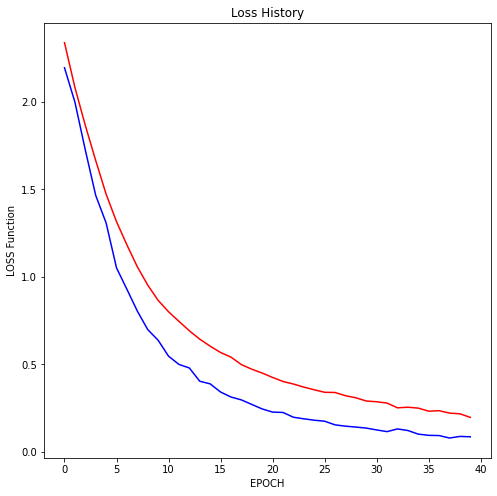

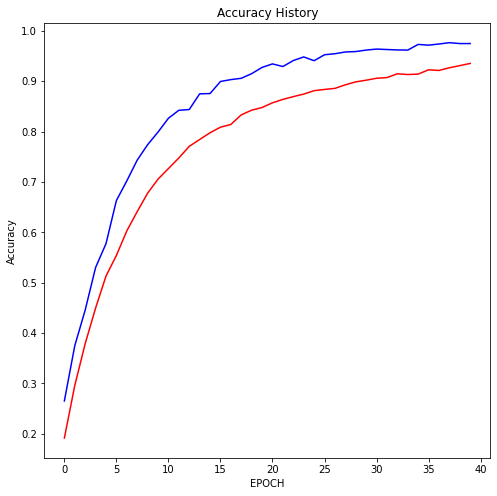

In [130]:
# 학습 결과를 그래프로 출력합니다.
draw_graph(history)

In [131]:
model.save('poster.h5')

In [15]:
#import tensorflow as tf

#model = tf.keras.models.load_model('poster.h5')

In [16]:
## 예측용 데이터 불러오기
path2 = './poster/'
file_list = os.listdir(path2)
data2 = []
count = 1
for A in file_list:
    if A == ".DS_Store":
        continue
    poster = Image.open(path2+A)
    data2.append((np.asarray(poster)))
    poster.close()

In [17]:
data2 = np.asarray(data2)/255.0

In [18]:
data2.shape

(38, 60, 60, 3)

In [19]:
predictions2 = model.predict(data2)

In [20]:
# 리스트 순서
print(file_list)
actor = {0:"하정우",1:"황정민",2:"김향기",3:"전지현",4:"정진영",5:"이정재",6:"마동석",7:"오달수",8:"류승룡",
        9:"설경구",10:"송강호",11:"유해진"}
for i, x in enumerate(predictions2):
    count = 0
    for y in x:
        if y > 0.8:
            count += 1
    if count > 0:
        print(str(i)+"번째 사진: "+file_list[i], actor[np.argmax(x)])

['BUSAN2.jpg', 'BUSAN3.jpg', 'BUSAN_1.jpg', 'G.jpg', 'G2.jpg', 'G3.jpg', 'GOD1.jpg', 'GOD2.jpg', 'GOD3.jpg', 'GOD4.jpg', 'GOD5.jpg', 'GOD6.jpg', 'GOD7.jpg', 'GOD8.jpg', 'GOD9.jpg', 'HARD_1.jpg', 'HARD_2.jpg', 'HARD_3.jpg', 'HARD_4.jpg', 'HARD_5.jpg', 'HUMAN_1.jpg', 'HUMAN_2.jpg', 'KILL1.jpg', 'KILL2.jpg', 'KILL3.jpg', 'KILL4.jpg', 'KILL5.jpg', 'NO7_1.jpg', 'NO7_2.jpg', 'NO7_3.jpg', 'NO7_4.jpg', 'NO7_5.jpg', 'People.jpg', 'TAXI1.jpg', 'test.png', 'test1.png', 'test2.png', 'test3.png']
5번째 사진: G3.jpg 이정재
7번째 사진: GOD2.jpg 마동석
9번째 사진: GOD4.jpg 하정우
10번째 사진: GOD5.jpg 김향기
12번째 사진: GOD7.jpg 김향기
19번째 사진: HARD_5.jpg 마동석
23번째 사진: KILL2.jpg 송강호
24번째 사진: KILL3.jpg 설경구
25번째 사진: KILL4.jpg 마동석
26번째 사진: KILL5.jpg 전지현
27번째 사진: NO7_1.jpg 오달수
29번째 사진: NO7_3.jpg 하정우
30번째 사진: NO7_4.jpg 김향기
32번째 사진: People.jpg 송강호
35번째 사진: test1.png 정진영
37번째 사진: test3.png 마동석


In [137]:
classes2 = os.listdir("data") # 순서에 따라 0~ 부여해야하므로 중요
#classes2.remove(".DS_Store") #['.DS_Store', '류승룡', '오달수']
#classes2.remove("poster") #포스터는 실제 예측데이터로 쓸거야!
for i, cls in enumerate(classes2):
    print(cls,i)

ha 0
hwang 1
hyang 2
jeon 3
jung 4
lee 5
ma 6
oh 7
ryu 8
seol 9
song 10
you 11


In [60]:
predictions2

array([[3.00753862e-04, 3.98204866e-05, 1.60058687e-06, 5.74486636e-09,
        2.10061862e-05, 2.41861835e-05, 1.21123679e-02, 5.88283874e-04,
        9.79033411e-01, 7.86637142e-03, 6.85397981e-06, 5.22864866e-06],
       [3.13685909e-02, 2.49046590e-02, 4.88480506e-03, 2.92236335e-03,
        2.73874477e-02, 4.93675679e-01, 2.72104726e-03, 8.94571189e-03,
        4.14230907e-03, 3.89269918e-01, 4.65554697e-03, 5.12203481e-03],
       [1.58791661e-01, 3.51063535e-02, 3.02305788e-01, 8.43343213e-02,
        2.10963134e-02, 5.54935597e-02, 8.96216631e-02, 1.44318044e-01,
        4.38737310e-02, 5.12562729e-02, 1.14219198e-02, 2.38039973e-03],
       [1.13459360e-02, 3.20577651e-01, 4.26355191e-03, 4.77836141e-03,
        1.65797710e-01, 4.72872466e-01, 4.30751359e-03, 2.00121594e-03,
        1.34210836e-03, 1.18086049e-02, 1.71872438e-04, 7.33032532e-04],
       [1.28178611e-01, 1.67783443e-02, 2.32306193e-03, 6.37510139e-03,
        6.74368024e-01, 1.54300183e-01, 1.55181205e-03, 1.02